# Tugas PCVK Pertemuan 5

In [154]:
# import library
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow

## No. 1

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


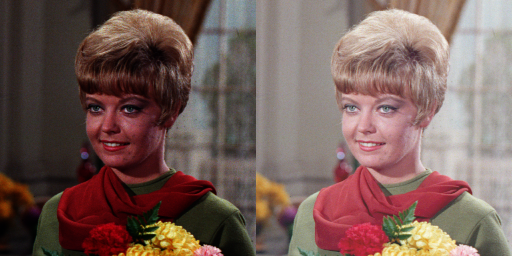

In [45]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')


def gammaCorrection(gamma, img):
  varGamma = 1 / gamma
  correction_image = ((img / 255)** varGamma) * 255
  correction_image = np.array(correction_image)

  return correction_image

image = cv.imread('female.tiff')
result = gammaCorrection(gamma, image)
result = result.astype(np.uint8)

final_result = cv.hconcat((image, result))
cv2_imshow(final_result)

## No. 2

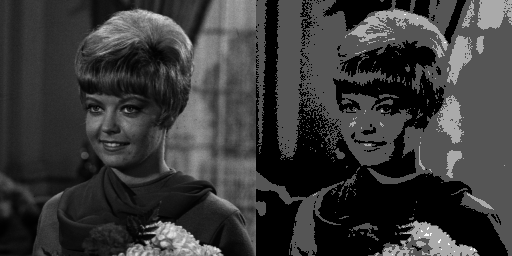

In [65]:
import cv2
import numpy as np

bit_depth = 2
level = 255 / (2**bit_depth - 1)

# Membaca citra grayscale
original = cv2.imread('female.tiff', cv2.IMREAD_GRAYSCALE)

# Membuat citra depth image dengan bit depth 2
depth_image = np.round(original / level ) * level
depth_image = depth_image.astype(np.uint8)

final = cv.hconcat((original, depth_image))
cv2_imshow(final)

## No 3

Average  5
PSNR:  27.54027560722257


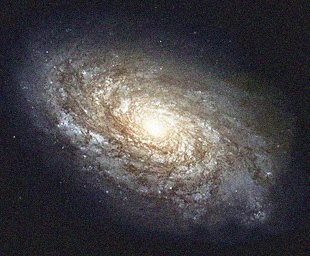



Average  10
PSNR:  27.554576266974383


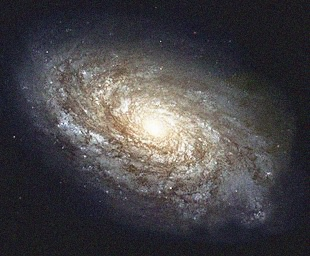



Average  20
PSNR:  27.513453882201347


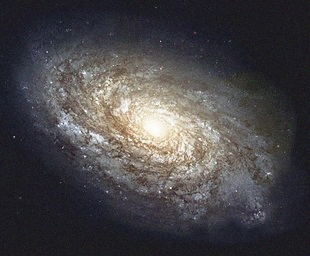



Average  40
PSNR:  27.483191019436923


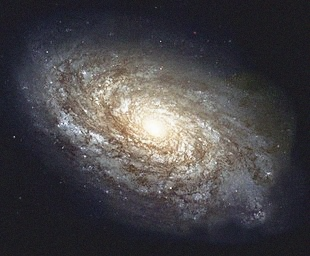



Average  80
PSNR:  27.43105855228464


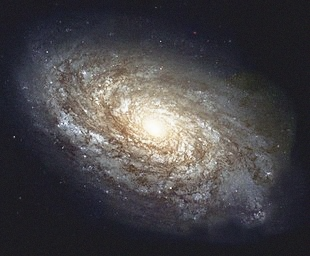



Average  100
PSNR:  27.410910973019732


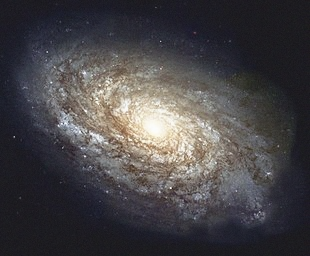

In [153]:
import glob

original = cv.imread('drive/MyDrive/Kuliah/PCVK/noise.jpg')

jumlahAvgCitra = [5, 10, 20, 40, 80, 100]
img_arr = []

for img in range(len(jumlahAvgCitra)):
  img_arr.append(np.zeros(original.shape, original.dtype))

# append 100 image gaussian noise
cv_img = []
for img in glob.glob('drive/MyDrive/Kuliah/PCVK/noises/*.jpg'):
 n= cv.imread(img)
 cv_img.append(n)

# fungsi untuk menghitung PSNR
def PSNR(img1, img2):
  mse = np.mean((img1-img2) ** 2)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

# menghitung average citra
for citra in range(len(jumlahAvgCitra)):
  for i in range(original.shape[0]):
    for j in range(original.shape[1]):
      for c in range(original.shape[2]):
        jumlah = 0
        avg = 0
        for n in range(jumlahAvgCitra[citra]):
          jumlah += cv_img[n][i,j,c]
        avg = float(jumlah / jumlahAvgCitra[citra] )
        img_arr[citra][i,j,c] = avg

for i in range(len(jumlahAvgCitra)):
  print("Average ", jumlahAvgCitra[i])
  print("PSNR: ", PSNR(original, img_arr[i]))
  cv2_imshow(img_arr[i])
  print("\n")



### Kesimpulan hasil pengerjaan no. 3 PSNR
PSNR (Peak Signal-to-Noise Ratio) adalah sebuah metrik yang digunakan untuk mengukur seberapa baik kualitas citra atau sinyal yang telah diproses atau dikompresi jika dibandingkan dengan citra atau sinyal aslinya.
PSNR menghitung perbandingan antara "sinyal" yang berisi informasi berguna dalam citra dengan "noise" yang menggangu. Semakin tinggi nilai PSNR, semakin baik kualitas citra atau sinyalnya.

Kesimpulannya dari percobaan tersebut adalah nilai PSNR tetap relatif stabil dalam kisaran sekitar 27 dB saat Anda menggunakan berbagai ukuran perataan (average) mulai dari 5 hingga 100. Ini menunjukkan bahwa perubahan ukuran perataan (average) tidak memiliki dampak signifikan pada kualitas citra hasil denoising, dalam percobaan di atas.

### No. 4

In [99]:
image = cv.imread('drive/MyDrive/Kuliah/PCVK/KTP.jpeg')

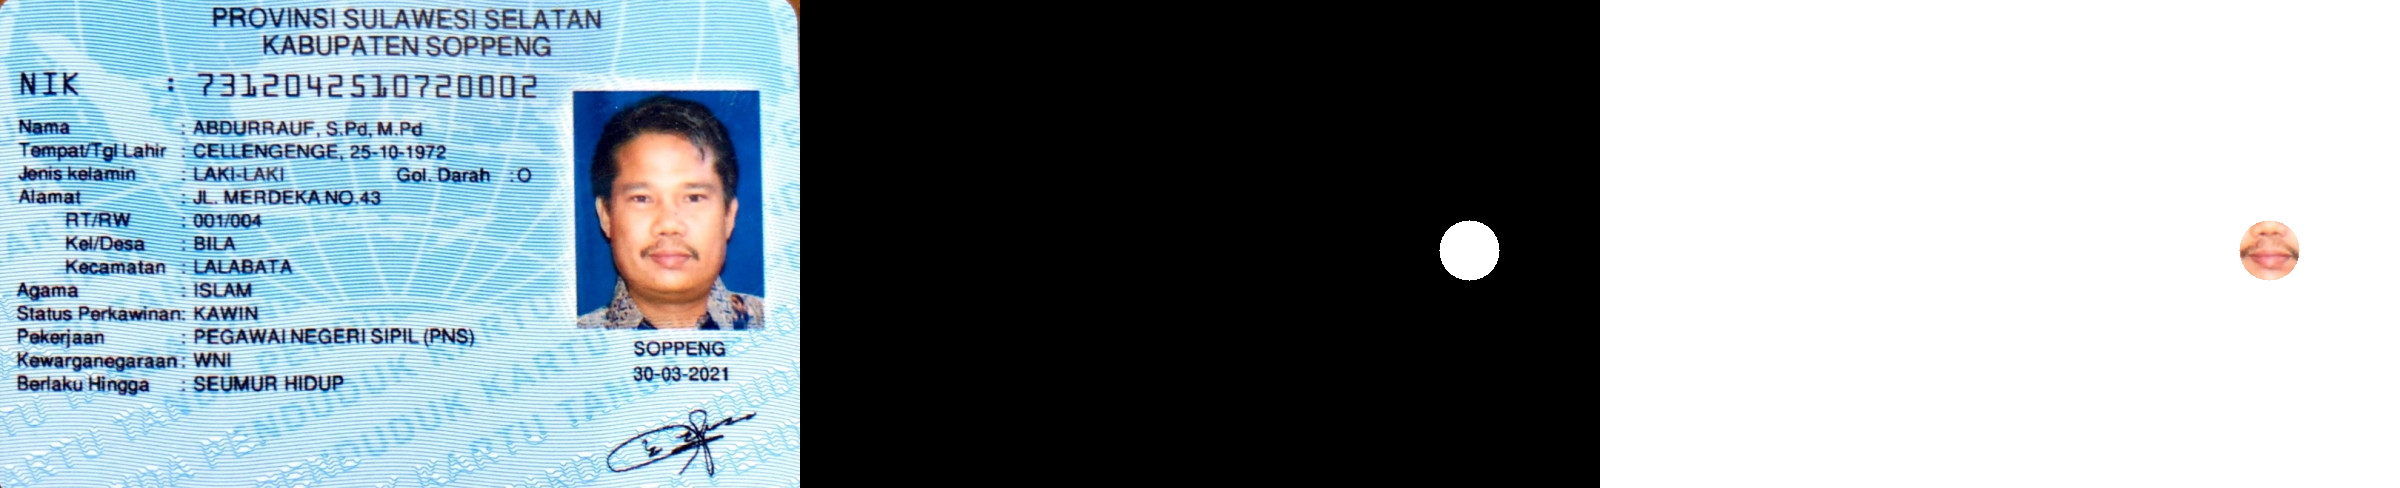

In [130]:
center1 = (669, 250)
radius1 = 30
mask = np.zeros_like(image)
cv2.circle(mask, center1, radius1, (255, 255, 255), -1)

masked_image = cv2.bitwise_and(~image, mask)
masked_image_2 = cv2.bitwise_not(masked_image)

final_frame = cv.hconcat((image, mask,masked_image_2))
cv2_imshow(final_frame)

### No. 5

### Not

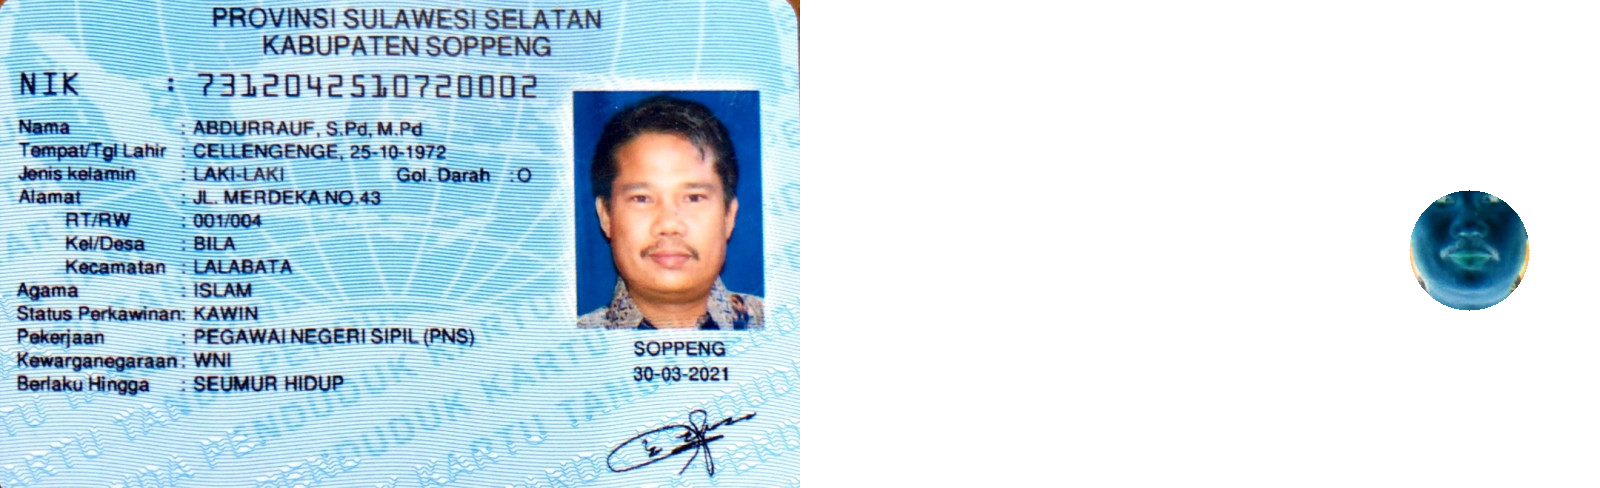

In [142]:
#Not
center1 = (669, 250)
radius1 = 60
mask = np.zeros_like(image)
cv2.circle(mask, center1, radius1, (255, 255, 255), -1)

masked_image = cv2.bitwise_not(cv2.bitwise_and(image, mask))

final_frame = cv.hconcat((image, masked_image))
cv2_imshow(final_frame)

### Or

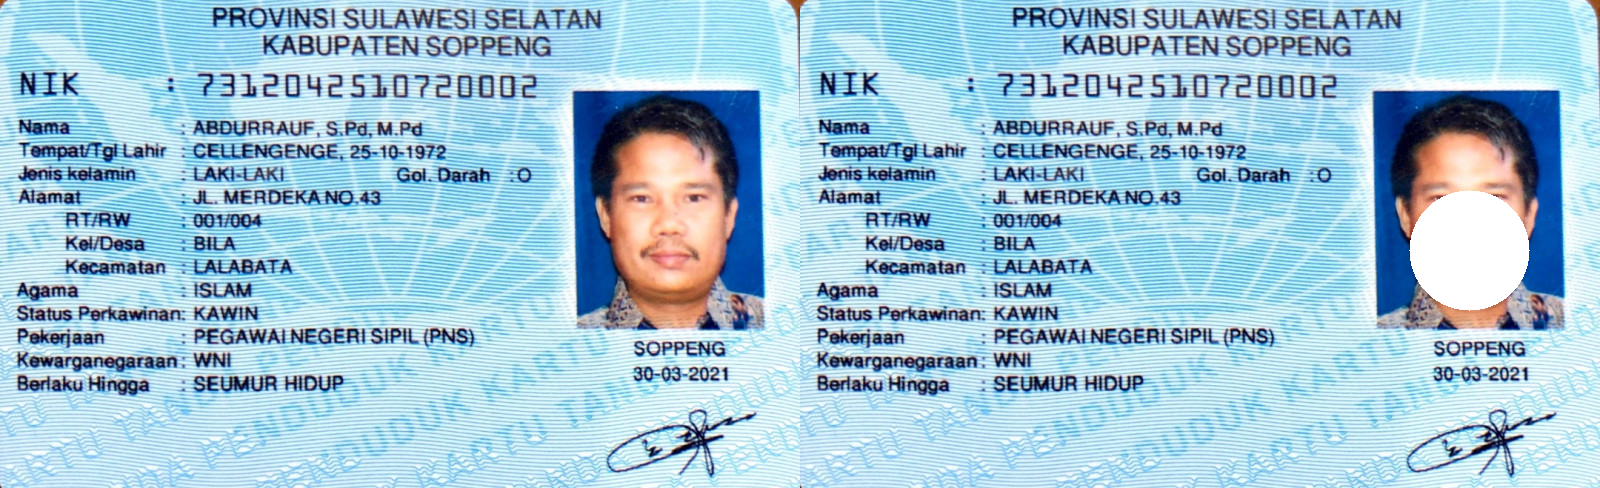

In [143]:
center1 = (669, 250)
radius1 = 60
mask = np.zeros_like(image)
cv2.circle(mask, center1, radius1, (255, 255, 255), -1)

masked_image = cv2.bitwise_or(image, mask)

final_frame = cv.hconcat((image, masked_image))
cv2_imshow(final_frame)

### And

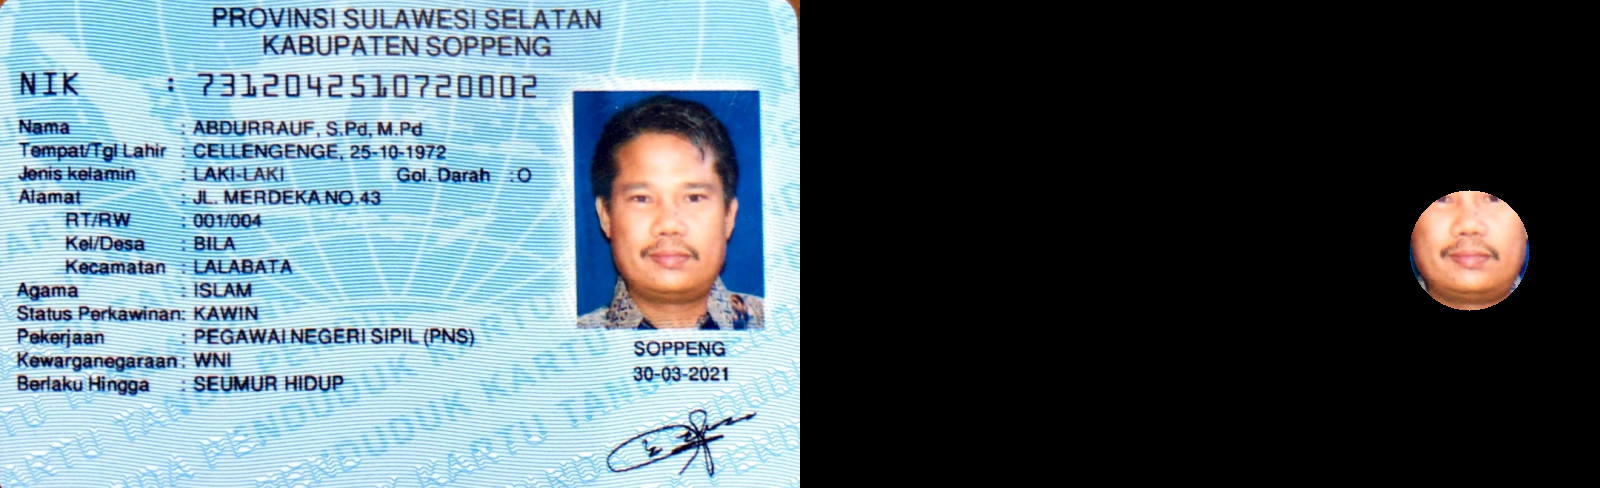

In [145]:
center1 = (669, 250)
radius1 = 60
mask = np.zeros_like(image)
cv2.circle(mask, center1, radius1, (255, 255, 255), -1)

masked_image = cv2.bitwise_and(image, mask)

final_frame = cv.hconcat((image, masked_image))
cv2_imshow(final_frame)

### Nand

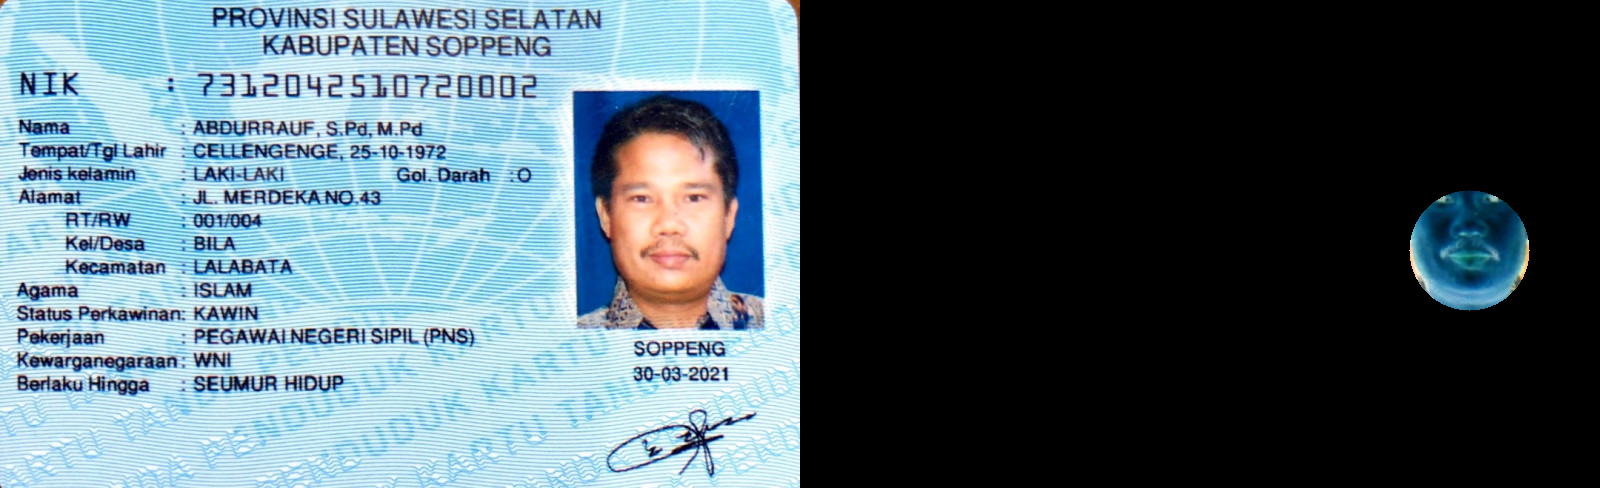

In [146]:
# nand
center1 = (669, 250)
radius1 = 60
mask = np.zeros_like(image)
cv2.circle(mask, center1, radius1, (255, 255, 255), -1)

masked_image = ~image & mask

final_frame = cv.hconcat((image, masked_image))
cv2_imshow(final_frame)

### Xor

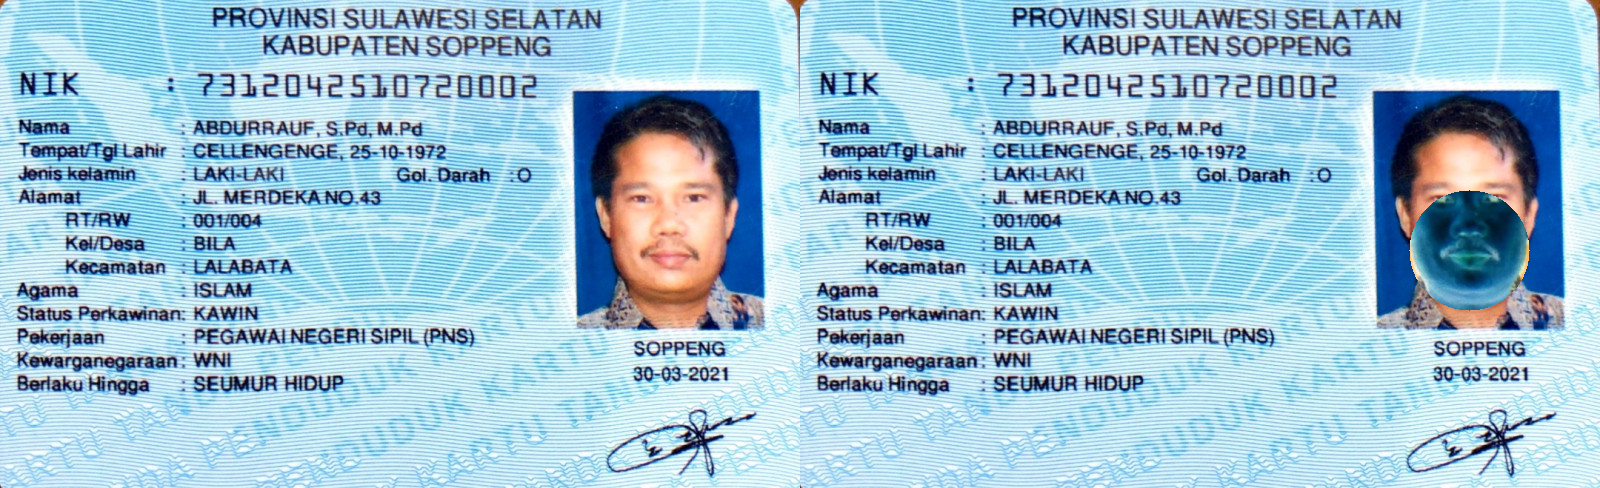

In [155]:
#xor
center1 = (669, 250)
radius1 = 60
mask = np.zeros_like(image)
cv2.circle(mask, center1, radius1, (255, 255, 255), -1)

masked_image = cv2.bitwise_xor(image, mask)

final_frame = cv.hconcat((image, masked_image))
cv2_imshow(final_frame)

1. Operasi AND: Ketika melakukan operasi AND pada dua citra, hasilnya hanya akan menampilkan bagian yang tumpang tindih (overlap) antara dua citra tersebut. Ini berarti hanya area yang ada dalam kedua citra yang akan muncul dalam hasil operasi.

2. Operasi OR: Sebaliknya, operasi OR akan menampilkan semua bagian dari kedua citra, kecuali area yang tidak ada dalam salah satu dari kedua citra. Ini berarti semua bagian dari kedua citra akan muncul dalam hasil operasi, dan area yang tidak ada dalam salah satu citra akan tetap transparan atau kosong.

3. Operasi NOT: Operasi NOT akan menghasilkan citra yang merupakan kebalikan dari citra masukan. Semua warna atau piksel yang ada dalam citra masukan akan diubah menjadi kebalikannya dalam hasil operasi. Warna yang semula ada akan menjadi putih, sedangkan warna yang tidak ada akan menjadi hitam.

4. Operasi NAND: Operasi NAND menghasilkan citra yang merupakan kebalikan dari citra masukan. Warna yang semula ada akan menjadi hitam, sedangkan warna yang tidak ada akan tetap putih.

5. Operasi XOR: Operasi XOR akan menghasilkan citra yang menampilkan semua bagian dari kedua citra. Namun, area yang tumpang tindih antara kedua citra akan diubah menjadi kebalikannya. Area yang sebelumnya memiliki warna akan menjadi warna yang berlawanan, sedangkan area yang sebelumnya kosong atau transparan akan tetap kosong.